EV Market Segmentation

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('EV_Dataset.csv')

In [229]:
df

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0
...,...,...,...,...,...,...,...,...
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0


In [230]:
df.columns = df.columns.str.strip()
df['State'] = df['State'].str.strip()
df['Vehicle_Type'] = df['Vehicle_Type'].str.strip()
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


C:\Users\legio\AppData\Local\Temp\ipykernel_26872\1324253345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_totals.index, y=ev_type_totals.values, palette='viridis')


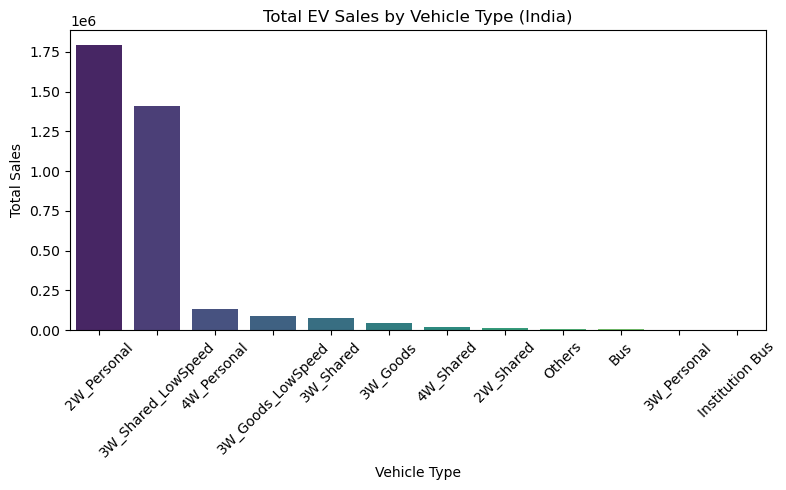

In [231]:
# Group total EV sales by Vehicle_Type
ev_type_totals = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=ev_type_totals.index, y=ev_type_totals.values, palette='viridis')
plt.title("Total EV Sales by Vehicle Type (India)")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Trend over time: Monthly EV sales

C:\Users\legio\AppData\Local\Temp\ipykernel_26872\3538092191.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['EV_Sales_Quantity'].sum()


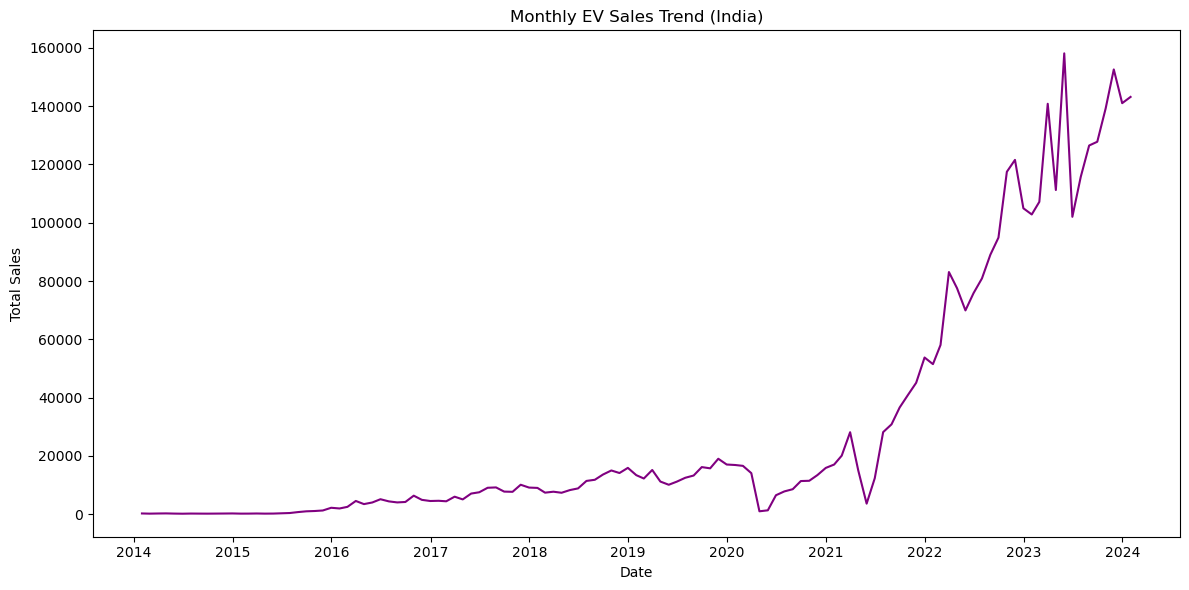

In [233]:
# Group by month
monthly_sales = df.resample('M', on='Date')['EV_Sales_Quantity'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, color='purple')
plt.title("Monthly EV Sales Trend (India)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


Top 10 States by total EV sales

C:\Users\legio\AppData\Local\Temp\ipykernel_26872\783185595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_totals.values, y=state_totals.index, palette='coolwarm')


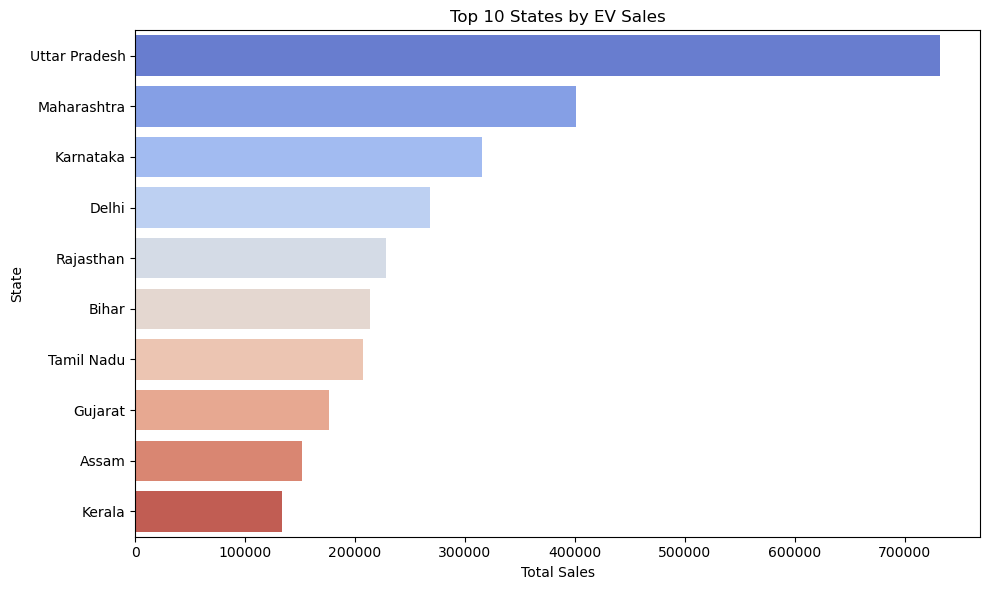

In [238]:
state_totals = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_totals.values, y=state_totals.index, palette='coolwarm')
plt.title("Top 10 States by EV Sales")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.tight_layout()
plt.show()


C:\Users\legio\AppData\Local\Temp\ipykernel_26872\3240555496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')


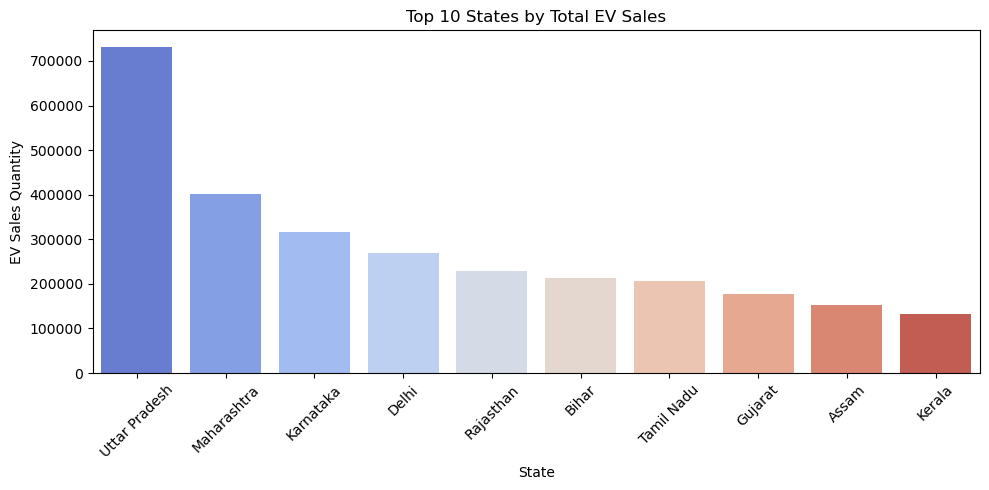

In [239]:
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')
plt.title("Top 10 States by Total EV Sales")
plt.xlabel("State")
plt.ylabel("EV Sales Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Share of EV sales by Vehicle_Category (like '2-Wheelers', '3-Wheelers', etc.)

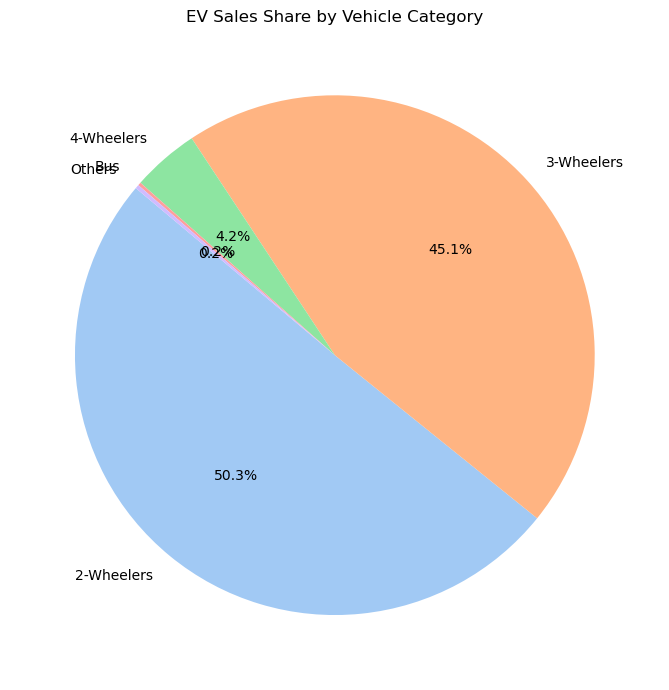

In [241]:
category_totals = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum()

plt.figure(figsize=(7,7))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("EV Sales Share by Vehicle Category")
plt.tight_layout()
plt.show()


Heatmap: EV sales by Year vs Vehicle_Category

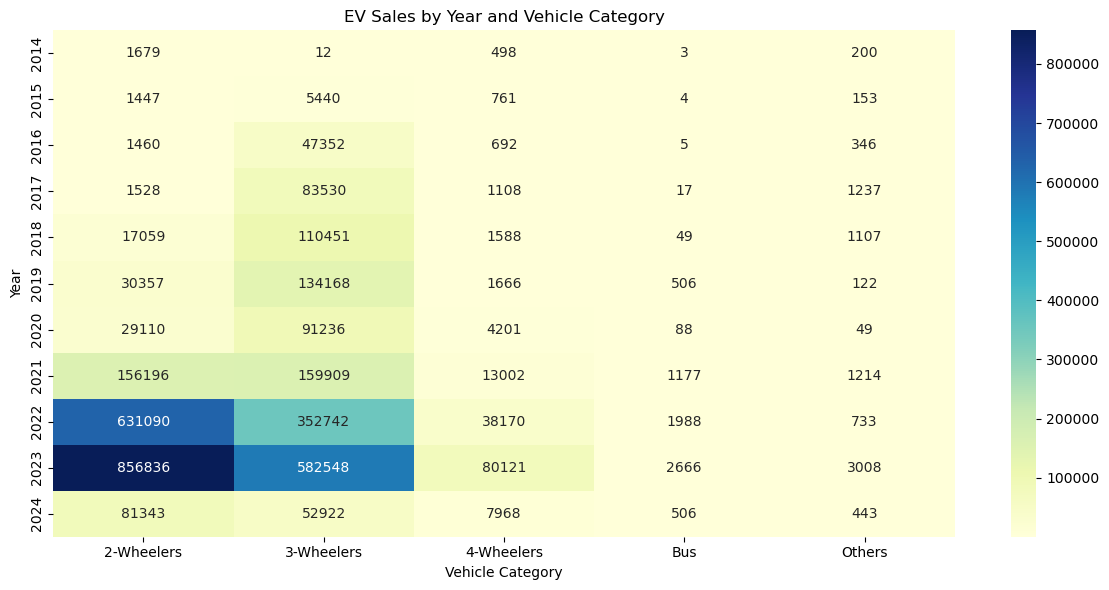

In [243]:
# Add 'Year' as integer
df['Year'] = df['Date'].dt.year

pivot_table = df.pivot_table(index='Year', columns='Vehicle_Category', values='EV_Sales_Quantity', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("EV Sales by Year and Vehicle Category")
plt.ylabel("Year")
plt.xlabel("Vehicle Category")
plt.tight_layout()
plt.show()


Top Vehicle Types over time (e.g., last 5 years)

C:\Users\legio\AppData\Local\Temp\ipykernel_26872\4057293361.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vt_sales = recent_years[recent_years['Vehicle_Type'] == vt].resample('M', on='Date')['EV_Sales_Quantity'].sum()
C:\Users\legio\AppData\Local\Temp\ipykernel_26872\4057293361.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vt_sales = recent_years[recent_years['Vehicle_Type'] == vt].resample('M', on='Date')['EV_Sales_Quantity'].sum()
C:\Users\legio\AppData\Local\Temp\ipykernel_26872\4057293361.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vt_sales = recent_years[recent_years['Vehicle_Type'] == vt].resample('M', on='Date')['EV_Sales_Quantity'].sum()


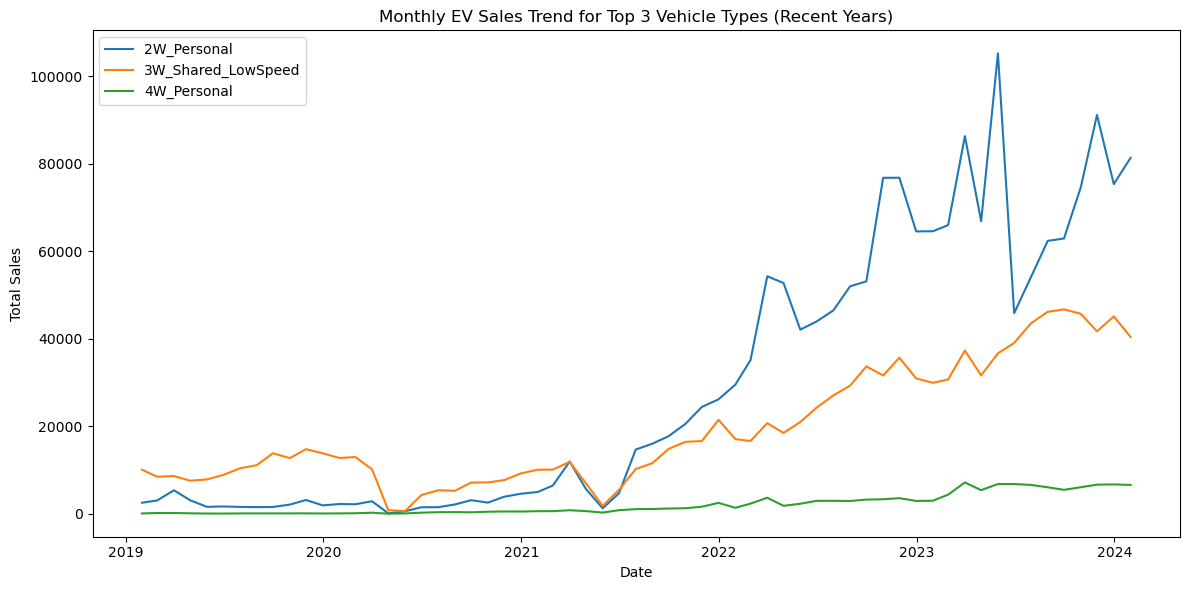

In [245]:
recent_years = df[df['Year'] >= df['Year'].max()-5]
top_types = recent_years.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(3).index

plt.figure(figsize=(12,6))
for vt in top_types:
    vt_sales = recent_years[recent_years['Vehicle_Type'] == vt].resample('M', on='Date')['EV_Sales_Quantity'].sum()
    sns.lineplot(x=vt_sales.index, y=vt_sales.values, label=vt)
plt.title("Monthly EV Sales Trend for Top 3 Vehicle Types (Recent Years)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\legio\AppData\Local\Temp\ipykernel_26872\2538459140.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top_states, x='State', y='EV_Sales_Quantity', hue='Vehicle_Type', ci=None)


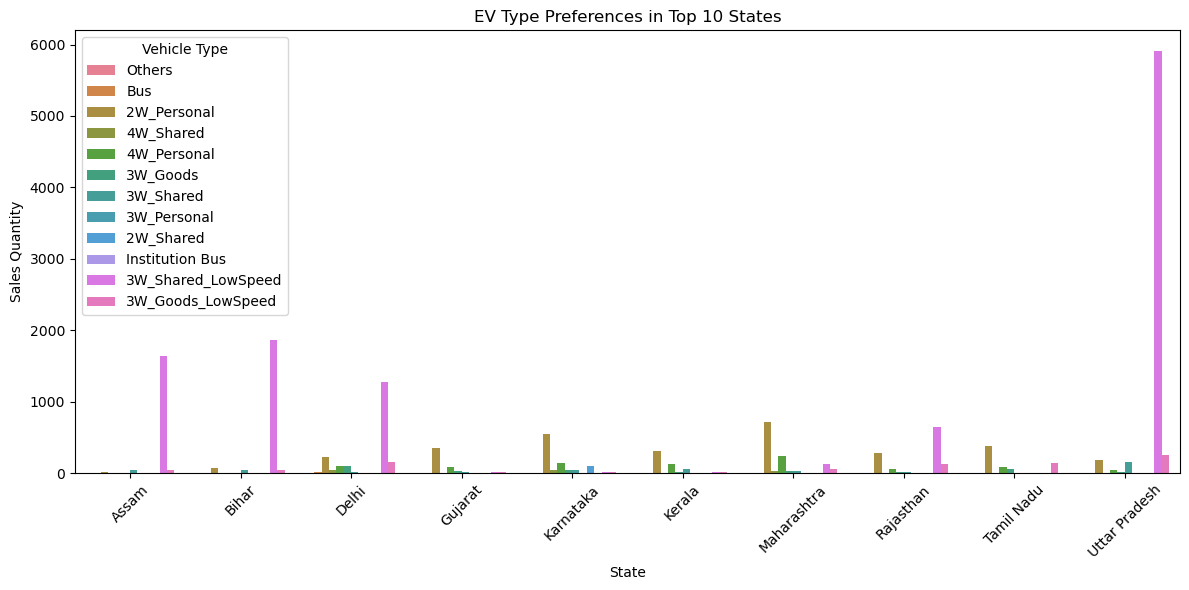

In [246]:
top_states_list = top_states.index.tolist()
df_top_states = df[df['State'].isin(top_states_list)]

plt.figure(figsize=(12,6))
sns.barplot(data=df_top_states, x='State', y='EV_Sales_Quantity', hue='Vehicle_Type', ci=None)
plt.title("EV Type Preferences in Top 10 States")
plt.xlabel("State")
plt.ylabel("Sales Quantity")
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()


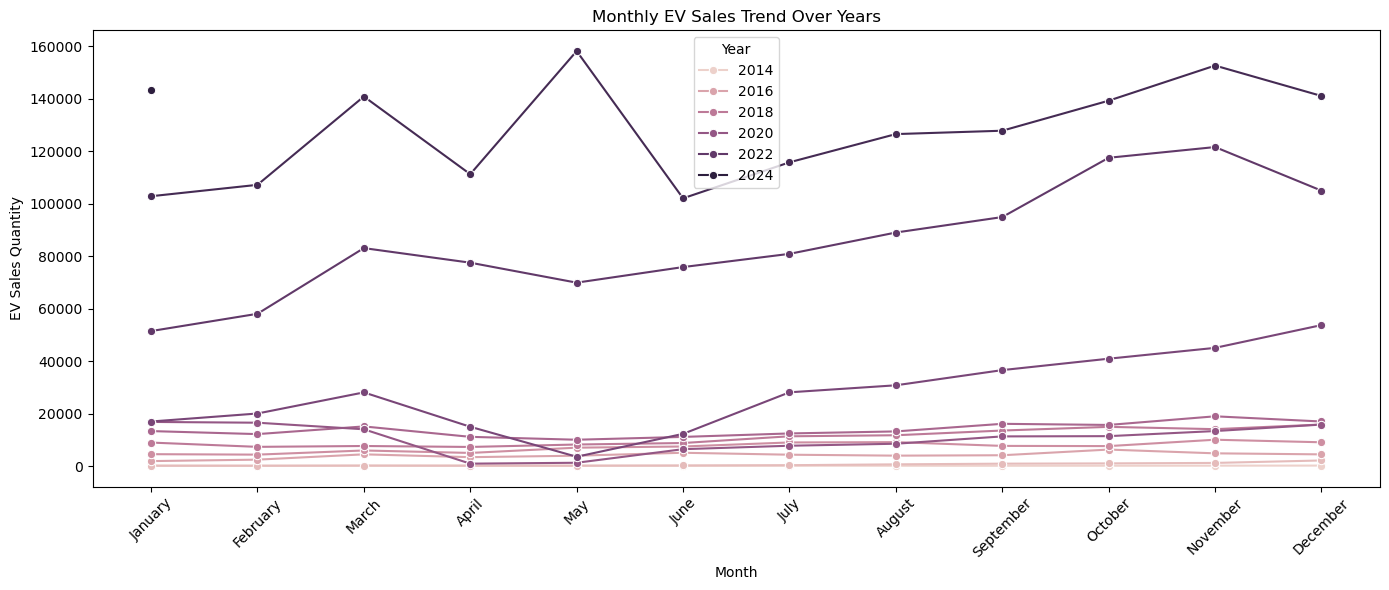

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year and Month Name freshly
df['Year'] = df['Date'].dt.year
df['Month_Name'] = df['Date'].dt.strftime('%B')

# Define proper month order
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

# Group EV sales by Year & Month
monthly_sales = df.groupby(['Year', 'Month_Name'])['EV_Sales_Quantity'].sum().reset_index()

# Convert Month_Name to categorical for correct plotting order
monthly_sales['Month_Name'] = pd.Categorical(monthly_sales['Month_Name'], categories=month_order, ordered=True)

# Sort by Year and Month
monthly_sales = monthly_sales.sort_values(['Year', 'Month_Name'])

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='Month_Name', y='EV_Sales_Quantity', hue='Year', marker='o')
plt.title("Monthly EV Sales Trend Over Years")
plt.xlabel("Month")
plt.ylabel("EV Sales Quantity")
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


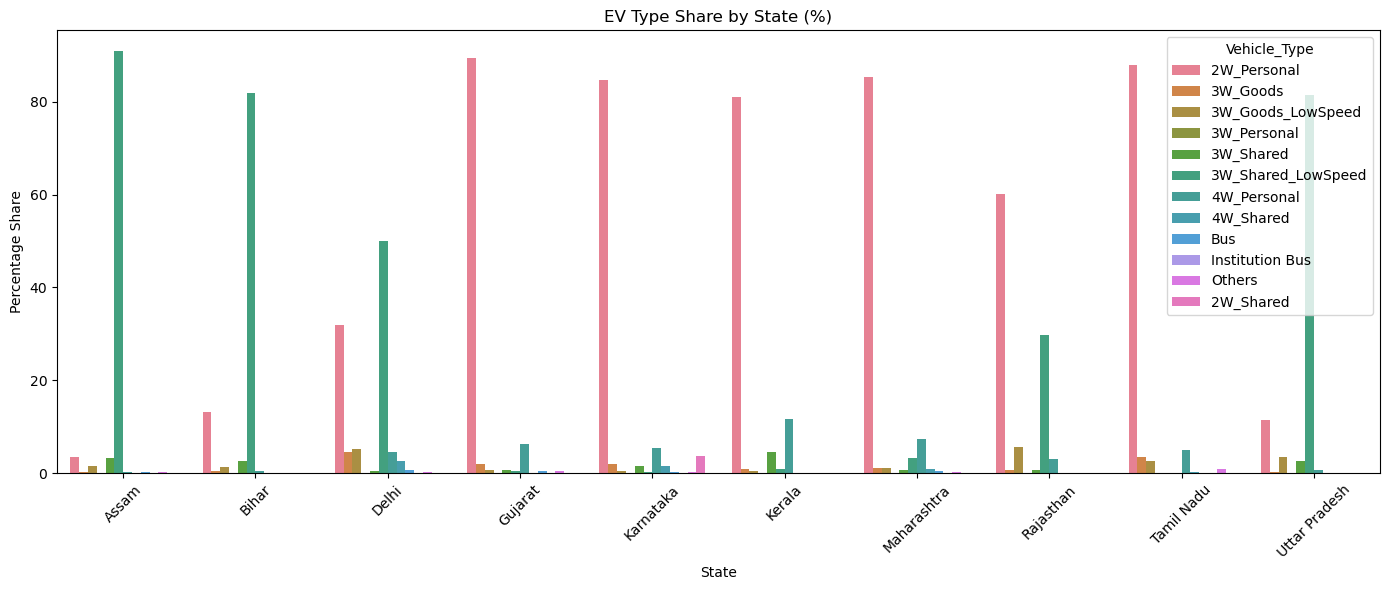

In [249]:
state_vehicle_share = df.groupby(['State', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().reset_index()

# Normalize to percent within state
state_total = state_vehicle_share.groupby('State')['EV_Sales_Quantity'].transform('sum')
state_vehicle_share['Percent'] = (state_vehicle_share['EV_Sales_Quantity'] / state_total) * 100

plt.figure(figsize=(14,6))
sns.barplot(data=state_vehicle_share[state_vehicle_share['State'].isin(top_states_list)],
            x='State', y='Percent', hue='Vehicle_Type')
plt.title("EV Type Share by State (%)")
plt.ylabel("Percentage Share")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Key Findings:

Huge growth trend: EV sales in India have surged rapidly, especially after 2021.

Dominance of 2-wheelers: The majority of EV sales are from 2-wheelers, showing they lead India’s EV adoption.

Top states: Uttar Pradesh, Maharashtra, and Karnataka are the biggest markets driving EV sales.

Diverse categories: While 2-wheelers dominate, there is steady growth in 3-wheelers and some increase in 4-wheelers (especially personal cars and taxis).

Top vehicle types: A few vehicle types contribute heavily to total sales, while others remain niche.

Year-wise category growth: The heatmap clearly shows a big jump in sales across all categories starting around 2021.

Overall Insight:
India's EV market is booming, driven mainly by affordable, high-volume segments like 2-wheelers and strong demand in key states. The growth trend suggests rising acceptance of EVs across categories, with policy support and infrastructure likely boosting future sales further.

## DATASET-Charging Station

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ev-charging-stations-india.csv')

# Clean column names and strings
# Convert to string before cleaning
df['state'] = df['state'].astype(str).str.strip().str.title()
df['city'] = df['city'].astype(str).str.strip().str.title()
df['type'] = df['type'].astype(str).str.strip().str.title()

df.head()


,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


 Number of charging stations by state


C:\Users\legio\AppData\Local\Temp\ipykernel_26872\3083220917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_counts.index, x=state_counts.values, palette='crest')


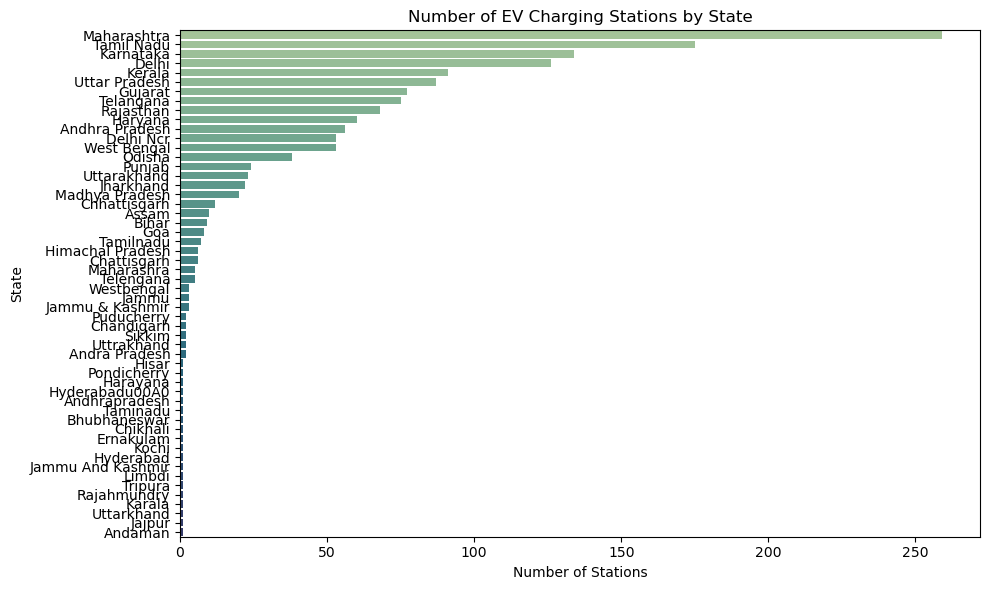

In [255]:
state_counts = df['state'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=state_counts.index, x=state_counts.values, palette='crest')
plt.title("Number of EV Charging Stations by State")
plt.xlabel("Number of Stations")
plt.ylabel("State")
plt.tight_layout()
plt.show()


Number of charging stations by city (Top 10 cities)

C:\Users\legio\AppData\Local\Temp\ipykernel_26872\3273272379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette='magma')


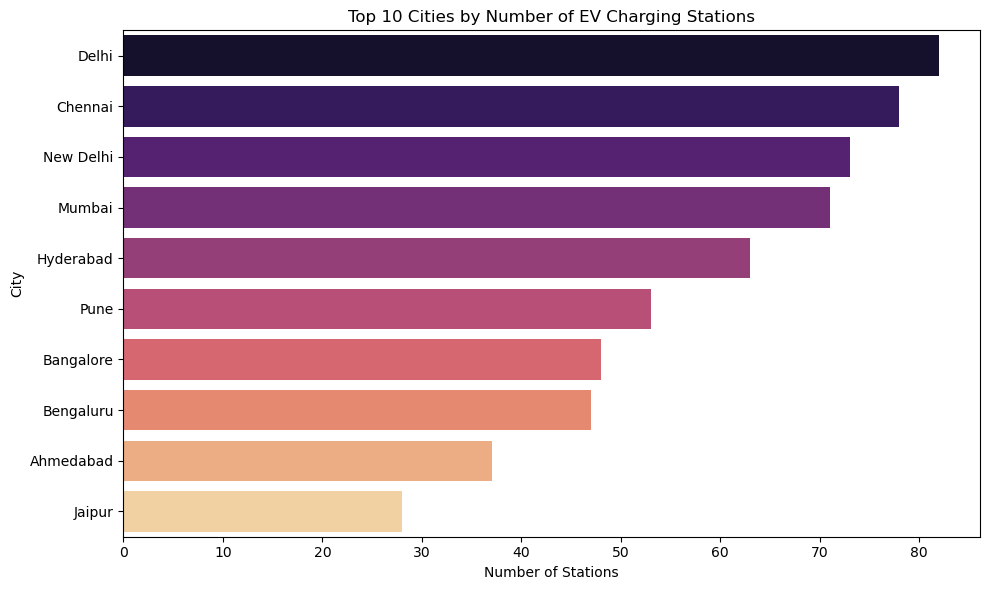

In [257]:
city_counts = df['city'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=city_counts.index, x=city_counts.values, palette='magma')
plt.title("Top 10 Cities by Number of EV Charging Stations")
plt.xlabel("Number of Stations")
plt.ylabel("City")
plt.tight_layout()
plt.show()


Heatmap of charging stations by state vs type

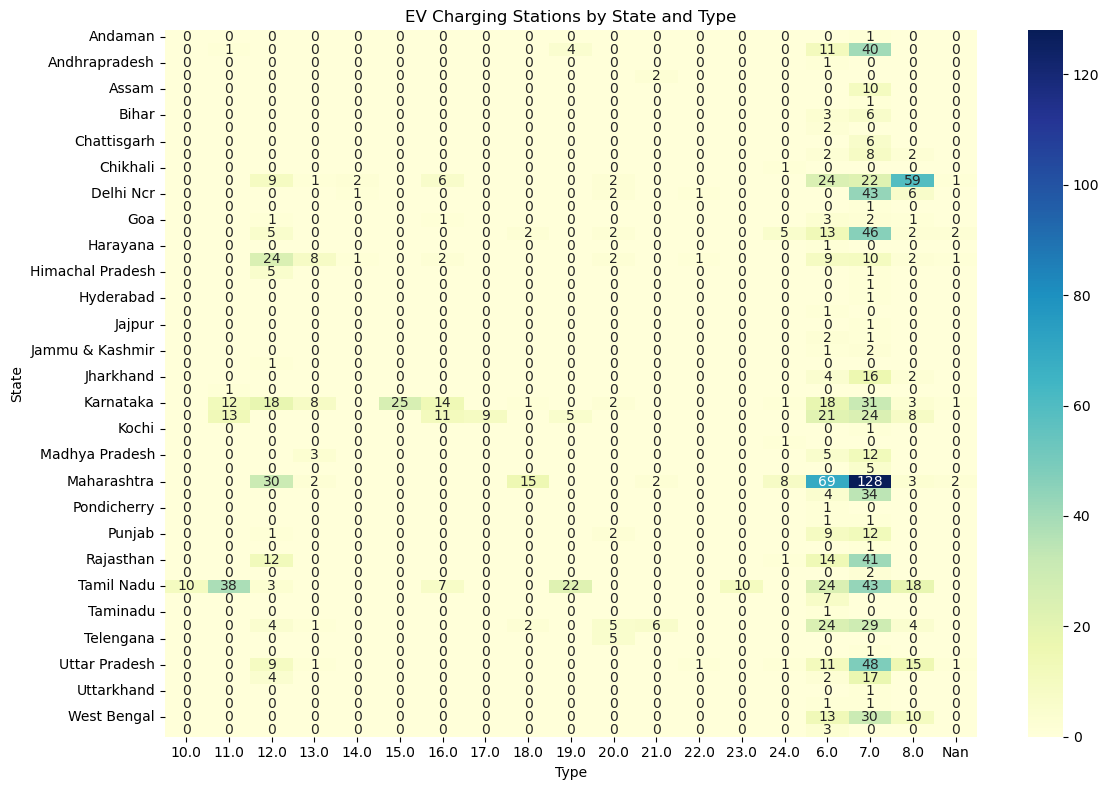

In [259]:
pivot = df.pivot_table(index='state', columns='type', values='name', aggfunc='count', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("EV Charging Stations by State and Type")
plt.xlabel("Type")
plt.ylabel("State")
plt.tight_layout()
plt.show()


Distribution of charging station types

C:\Users\legio\AppData\Local\Temp\ipykernel_26872\2651575528.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=charger_counts, x='Charger_Type', y='Count', palette='viridis')


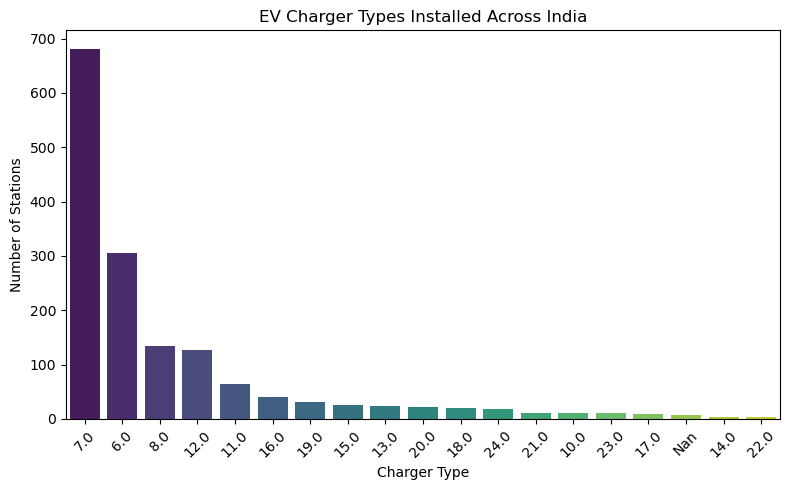

In [261]:
# Count by charger type
charger_counts = df['type'].value_counts().reset_index()
charger_counts.columns = ['Charger_Type', 'Count']

# Plot charger types
plt.figure(figsize=(8,5))
sns.barplot(data=charger_counts, x='Charger_Type', y='Count', palette='viridis')
plt.title('EV Charger Types Installed Across India')
plt.xlabel('Charger Type')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [262]:
print(df['type'].unique())


['12.0' '6.0' '7.0' '13.0' '14.0' '8.0' '15.0' '16.0' '17.0' '18.0' '19.0'
 'Nan' '20.0' '21.0' '11.0' '10.0' '24.0' '22.0' '23.0']


C:\Users\legio\AppData\Local\Temp\ipykernel_26872\244517078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_counts.head(10), x='State', y='Charging_Stations', palette='coolwarm')


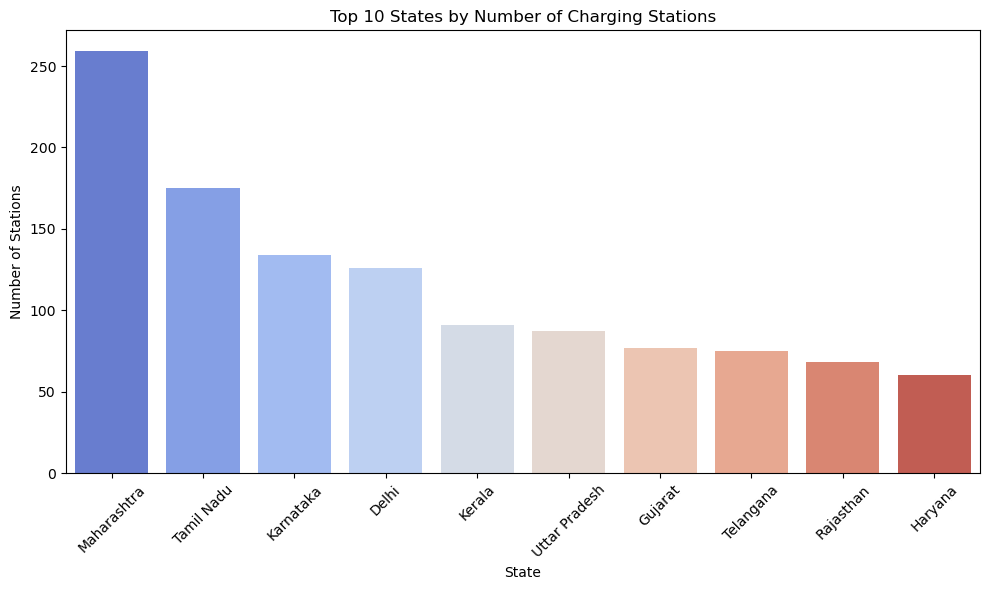

In [263]:
#States with Most Charging Stations
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['State', 'Charging_Stations']

plt.figure(figsize=(10,6))
sns.barplot(data=state_counts.head(10), x='State', y='Charging_Stations', palette='coolwarm')
plt.title('Top 10 States by Number of Charging Stations')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Key Findings:

Concentration in few states: Charging infrastructure is heavily concentrated in states like Maharashtra, Karnataka, Delhi, and Gujarat, which together host the highest number of stations.

Urban focus: Cities like Delhi, Chennai, and Mumbai emerge as top hubs for EV charging, showing urban EV adoption is ahead of smaller cities.

Type diversity: There’s a dominance of certain charger types (likely popular fast chargers), while many other types remain much less common.

State vs type spread: The heatmap shows some states (like Maharashtra and Karnataka) support a wider mix of charger types, indicating more mature infrastructure.

Top 10 states lead: The top 10 states have a clear infrastructure advantage, which could accelerate EV adoption there compared to others.

India’s EV charging network is growing but remains unevenly distributed, with infrastructure clustered in a few leading states and large cities. Expanding coverage to other states and rural areas—and diversifying charger types—will be crucial to support broader EV adoption nationwide.

In [269]:
income = pd.read_csv('data.csv')  # Kaggle data
income


,State Name,Geometry,NSDP Per Capita (Nominal)1996-97,NSDP Per Capita (Nominal)2000-01,NSDP Per Capita (Nominal)2005-06,NSDP Per Capita (Nominal)2010-11,NSDP Per Capita (Nominal)2011-12,NSDP Per Capita (Nominal)2012-13,NSDP Per Capita (Nominal)2013-14,NSDP Per Capita (Nominal)2014-15,NSDP Per Capita (Nominal)2015-16,NSDP Per Capita (Nominal)2016-17,NSDP Per Capita (Nominal)2017-18,NSDP Per Capita (Nominal)2018-19,NSDP Per Capita (Nominal)2019-20,Growth from 2000 to 2010,Growth from 2010 to 2019
0,Arunachal Pradesh,"POLYGON ((96.16260946675357 29.38078474502004,...","₹ 10,816","₹ 15,260","₹ 28,171","₹ 60,961","₹ 73,068","₹ 81,353","₹ 91,809","₹ 1,10,929","₹ 1,12,046","₹ 1,17,344","₹ 1,30,197","₹ 1,39,588","₹ 1,69,742",299%,178.0 %
1,Assam,MULTIPOLYGON (((89.74322932956994 26.303620341...,"₹ 7,394","₹ 12,803","₹ 18,396","₹ 33,087","₹ 41,142","₹ 44,599","₹ 49,734","₹ 52,895","₹ 60,817","₹ 66,330","₹ 74,184","₹ 82,078","₹ 86,801",158%,162.0 %
2,Bihar,MULTIPOLYGON (((84.50719832504274 24.263231032...,"₹ 4,001","₹ 6,415","₹ 8,223","₹ 19,111","₹ 21,750","₹ 24,487","₹ 26,948","₹ 28,671","₹ 30,404","₹ 34,156","₹ 38,631","₹ 43,822","₹ 46,292",197%,142.0 %
3,Chhattisgarh,"POLYGON ((83.33531747931829 24.09885072448139,...","₹ 8,353","₹ 10,744","₹ 20,117","₹ 41,165","₹ 55,177","₹ 60,849","₹ 69,880","₹ 72,936","₹ 73,590","₹ 81,808","₹ 89,813","₹ 96,887","₹ 1,04,989",283%,155.0 %
4,Goa,MULTIPOLYGON (((74.11917887850251 14.753440750...,"₹ 26,418","₹ 43,735","₹ 84,721","₹ 1,68,024","₹ 2,59,444","₹ 2,34,354","₹ 2,15,776","₹ 2,89,185","₹ 3,34,575","₹ 3,82,140","₹ 4,22,155","₹ 4,58,304","₹ 4,35,959",284%,159.0 %
5,Gujarat,MULTIPOLYGON (((71.70375251096965 20.999582290...,"₹ 16,153","₹ 18,392","₹ 37,780","₹ 77,485","₹ 87,481","₹ 1,02,826","₹ 1,13,139","₹ 1,27,017","₹ 1,39,254","₹ 1,56,295","₹ 1,73,079","₹ 1,97,447","₹ 2,13,936",321%,176.0 %
6,Haryana,"POLYGON ((76.85065405474091 30.87511930631098,...","₹ 16,611","₹ 25,583","₹ 42,309","₹ 93,852","₹ 1,06,085","₹ 1,21,169","₹ 1,37,770","₹ 1,47,382","₹ 1,64,963","₹ 1,85,050","₹ 2,11,526","₹ 2,36,147","₹ 2,47,628",266%,164.0 %
7,Himachal Pradesh,"POLYGON ((76.79633817057015 33.25489599215638,...","₹ 11,960","₹ 22,795","₹ 36,949","₹ 68,297","₹ 87,721","₹ 99,730","₹ 1,14,095","₹ 1,23,299","₹ 1,35,512","₹ 1,50,290","₹ 1,67,044","₹ 1,79,188","₹ 1,83,407",200%,169.0 %
8,Jammu and Kashmir,"POLYGON ((74.73450654094415 37.02068299862157,...","₹ 8,667","₹ 14,268","₹ 23,240","₹ 40,089","₹ 53,173","₹ 56,828","₹ 61,108","₹ 61,211","₹ 73,215","₹ 77,023","₹ 82,710","₹ 91,882","₹ 1,04,889",180%,162.0 %
9,Jharkhand,"POLYGON ((87.60581887124397 25.31511789487502,...","₹ 7,235","₹ 10,345","₹ 18,326","₹ 34,721","₹ 41,254","₹ 47,360","₹ 50,006","₹ 57,301","₹ 52,754","₹ 60,018","₹ 69,265","₹ 76,019","₹ 75,739",235%,118.0 %


In [270]:
income = income[['State Name', 'NSDP Per Capita (Nominal)2019-20']].copy()

# Clean column names
income.columns = ['state', 'income']

# Clean income numbers
income['income'] = income['income'].replace('[₹,]', '', regex=True).astype(float)

# Optional: title-case state names to match other dataset
income['state'] = income['state'].astype(str).str.strip().str.title()

income.head()


,state,income
0,Arunachal Pradesh,169742.0
1,Assam,86801.0
2,Bihar,46292.0
3,Chhattisgarh,104989.0
4,Goa,435959.0


In [271]:
merged = df.merge(income, on='state', how='left')

merged.head()


,name,state,city,address,lattitude,longitude,type,income
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0,247628.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0,247628.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0,116492.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0,65431.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0,65431.0


 Plot: Income vs EV charging stations

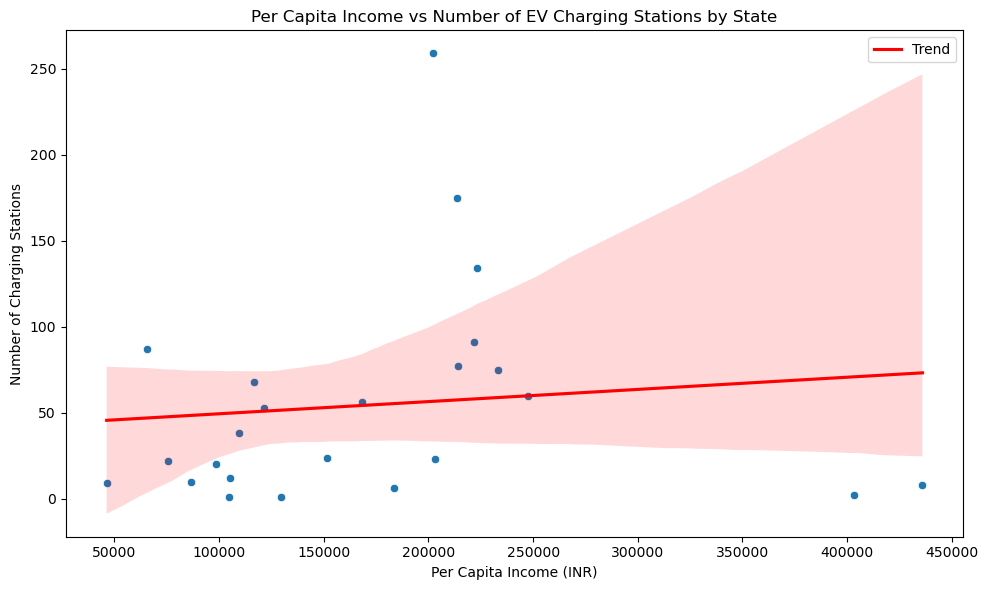

In [273]:
state_ev_counts = merged.groupby('state').size().reset_index(name='num_stations')

state_ev_income = state_ev_counts.merge(income, on='state', how='left')

plt.figure(figsize=(10,6))
sns.scatterplot(data=state_ev_income, x='income', y='num_stations')
sns.regplot(data=state_ev_income, x='income', y='num_stations', scatter=False, color='red', label='Trend')
plt.title("Per Capita Income vs Number of EV Charging Stations by State")
plt.xlabel("Per Capita Income (INR)")
plt.ylabel("Number of Charging Stations")
plt.legend()
plt.tight_layout()
plt.show()


In [274]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Create aggregated data: number of stations per state + mean income + mean charger type
df_grouped = merged.groupby('state').agg({
    'income': 'mean',
    'type': 'nunique'  # number of charger types installed
}).reset_index()
print(df_grouped)
print(df_grouped.isna().sum())


                state    income  type
0             Andaman       NaN     1
1      Andhra Pradesh  168480.0     4
2       Andhrapradesh       NaN     1
3       Andra Pradesh       NaN     1
4               Assam   86801.0     1
5        Bhubhaneswar       NaN     1
6               Bihar   46292.0     2
7          Chandigarh       NaN     1
8         Chattisgarh       NaN     1
9        Chhattisgarh  104989.0     3
10           Chikhali       NaN     1
11              Delhi       NaN     9
12          Delhi Ncr       NaN     5
13          Ernakulam       NaN     1
14                Goa  435959.0     5
15            Gujarat  213936.0     8
16           Harayana       NaN     1
17            Haryana  247628.0    10
18   Himachal Pradesh  183407.0     2
19              Hisar       NaN     1
20          Hyderabad       NaN     1
21     Hyderabadu00A0       NaN     1
22             Jajpur       NaN     1
23              Jammu       NaN     2
24    Jammu & Kashmir       NaN     2
25  Jammu An

In [275]:
df_grouped = df_grouped.dropna()


In [276]:
df_grouped

,state,income,type
1,Andhra Pradesh,168480.0,4
4,Assam,86801.0,1
6,Bihar,46292.0,2
9,Chhattisgarh,104989.0,3
14,Goa,435959.0,5
15,Gujarat,213936.0,8
17,Haryana,247628.0,10
18,Himachal Pradesh,183407.0,2
25,Jammu And Kashmir,104889.0,1
26,Jharkhand,75739.0,3


C:\Users\legio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


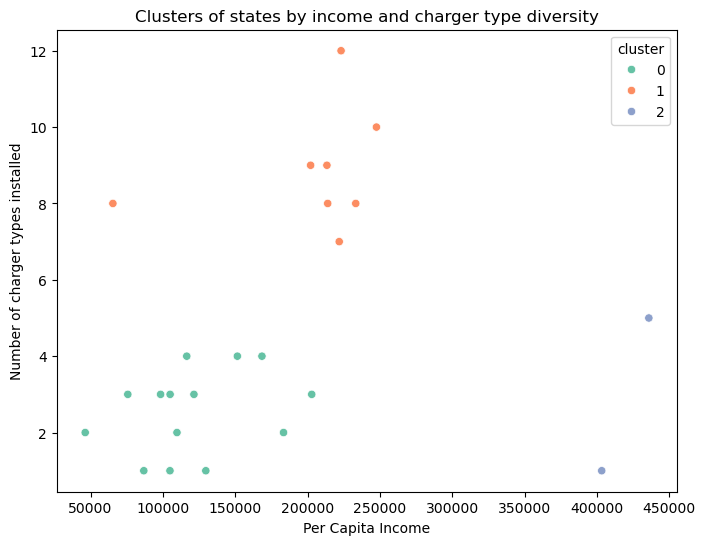

In [277]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grouped[['income', 'type']])

kmeans = KMeans(n_clusters=3, random_state=42)
df_grouped['cluster'] = kmeans.fit_predict(X_scaled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_grouped, x='income', y='type', hue='cluster', palette='Set2')
plt.title('Clusters of states by income and charger type diversity')
plt.xlabel('Per Capita Income')
plt.ylabel('Number of charger types installed')
plt.show()
